In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

# Extra Questions

### Q. Create a bar chart bar depicting gender wise readmission.

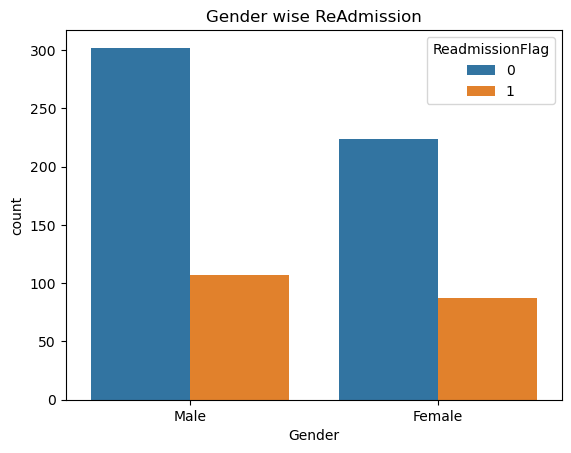

In [88]:
df1 = pd.read_excel("HospitalDatabase.xlsx","Patients")
df2 = pd.read_excel("HospitalDatabase.xlsx","ReAdmissionRegistry")
df = df2.merge(df1,on ='PatientID')

df['ReadmissionFlag']=df['ReadmissionFlag'].fillna('0').astype(int)

sns.countplot(x = df['Gender'], hue = df['ReadmissionFlag']).set_title("Gender wise ReAdmission")
plt.show()

### Q. Apply aggregate functions on 'Expected Mortality' and 'Age'  taking gender into account

In [35]:
df1 = pd.read_excel("HospitalDatabase.xlsx","Patients")
df2 = pd.read_excel("HospitalDatabase.xlsx","ReAdmissionRegistry")
data = df2.merge(df1,on ='PatientID')

from dateutil.relativedelta import relativedelta

data['Age'] = [relativedelta(pd.Timestamp.now(), d).years for d in data['DateOfBirth']]

result = data.loc[:,['ExpectedMortality','Age','Gender']]
test = result.groupby(['Gender'])
test.describe().T

Gender                       Female        Male
ExpectedMortality count  311.000000  409.000000
                  mean     0.335509    0.340005
                  std      0.230244    0.245485
                  min      0.003276    0.000006
                  25%      0.151260    0.129200
                  50%      0.298761    0.288647
                  75%      0.470745    0.511591
                  max      0.980479    0.989945
Age               count  311.000000  409.000000
                  mean    49.167203   49.361858
                  std      8.018387    7.808122
                  min     35.000000   35.000000
                  25%     43.000000   43.000000
                  50%     49.000000   49.000000
                  75%     57.000000   56.000000
                  max     63.000000   63.000000

### Q. Calculate the Readmission Rate

In [44]:
data = pd.read_excel("HospitalDatabase.xlsx","ReAdmissionRegistry")
SumOfReadmissionFlags = data['ReadmissionFlag'].sum()
CountOfAdmissionIds = data['AdmissionID'].count()

ReadmissionRate = round((SumOfReadmissionFlags / CountOfAdmissionIds),3)
print("The Readmission rate is : ", ReadmissionRate) 

The Readmission rate is :  0.269


### Q. Concise summary of the data sheet 'Discharges'

In [5]:
data = pd.read_excel("HospitalDatabase.xlsx","Discharges")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   AdmissionID           720 non-null    int64         
 1   PatientID             720 non-null    int64         
 2   AdmissionDate         720 non-null    datetime64[ns]
 3   DischargeDate         720 non-null    datetime64[ns]
 4   DischargeDisposition  720 non-null    object        
 5   Service               720 non-null    object        
 6   PrimaryDiagnosis      720 non-null    object        
 7   ExpectedLOS           720 non-null    float64       
 8   ExpectedMortality     720 non-null    float64       
dtypes: datetime64[ns](2), float64(2), int64(2), object(3)
memory usage: 50.8+ KB


### Q. Calculate the number of provides for each speciality

In [4]:
data = pd.read_excel('HospitalDatabase.xlsx', sheet_name='Providers')
data1 = (data.groupby(['ProviderSpecialty']).size()).reset_index(name='ProviderCount')
data1

,ProviderSpecialty,ProviderCount
0,Cardiology,8
1,Pediatrics,9
2,PrimaryCare,16
3,Surgery,7


### Q. Boxplot to show DaysToReadmission

<AxesSubplot:>

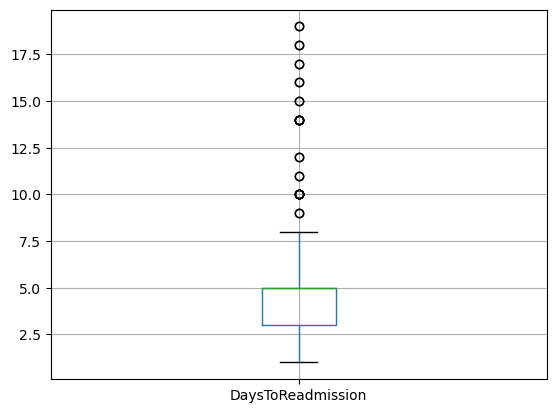

In [3]:
df = pd.read_excel("HospitalDatabase.xlsx",sheet_name=None)
Entire_dataset=pd.concat(df.values())
Entire_dataset[['DaysToReadmission']].boxplot()